In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

%matplotlib inline

## Porta AND/OR

In [5]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# porta OR
#y = np.array([0, 1, 1, 1])

# porta AND
y = np.array([0, 0, 0, 1]).T 

print(x.shape, y.shape)

(4, 2) (4,)


### Python

In [6]:
d = x.shape[1]

w = [2 * random() - 1 for i in range(d)]

b = 2 * random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        
        error = y_n - y_pred
        
        w = [(w_i + learning_rate * error * x_i) for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate * error
        
        cost += error**2
    
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')
print(f't_pred: {np.dot(x, np.array(w)) + b}')

step 0: 2
step 10: 2
step 20: 2
step 30: 2
step 40: 1
step 50: 2
step 60: 2
step 70: 1
step 80: 2
step 90: 2
step 100: 1
w: [0.3712586610375035, -0.0527756378147407]
b: -0.3123360142456698
t_pred: [-0.31233601 -0.36511165  0.05892265  0.00614701]


### Numpy

In [7]:
d = x.shape[1]

w = 2 * np.random.random(size=d) - 1

b = 2 * np.random.random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        
        error = y_n - y_pred
        
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        
        cost += error**2
        
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')
print(f't_pred: {np.dot(x, np.array(w)) + b}')

step 0: 3
step 10: 3
step 20: 3
step 30: 3
step 40: 3
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.01894768 0.01746238]
b: -0.029749322954728825
t_pred: [-0.02974932 -0.01228694 -0.01080164  0.00666074]


## Exercício de Classificação

(100, 2) (100,)


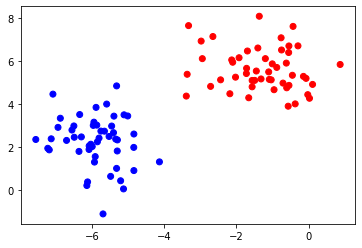

In [8]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

In [9]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step 0: 2
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.7176494416007357, 0.6484457688164317]
b: 0.4237716950686523


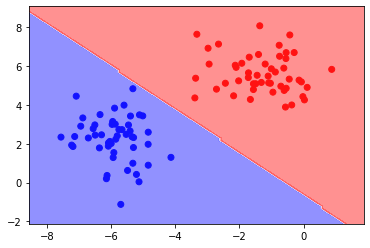

In [10]:
d = x.shape[1]

w = [2 * random() - 1 for i in range(d)]

b = 2 * random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = sum([x_i * w_i for x_i, w_i in zip(x_n, w)]) + b
        y_pred = 1 if y_pred > 0 else 0
        
        error = y_n - y_pred
        
        w = [(w_i + learning_rate * error * x_i) for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate * error
        
        cost += error**2
    
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')

plot_linear_classifier(x, y, w, b)

### Numpy

step 0: 13
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
step 60: 0
step 70: 0
step 80: 0
step 90: 0
step 100: 0
w: [0.32688524 0.33748465]
b: -0.15909520904085883


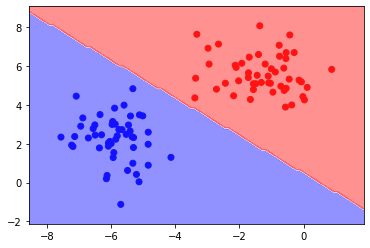

In [11]:
d = x.shape[1]

w = 2 * np.random.random(size=d) - 1

b = 2 * np.random.random() - 1

learning_rate = 1e-2

for step in range(101):
    cost = 0
    
    for x_n, y_n in zip(x, y):
        y_pred = np.dot(x_n, w) + b
        y_pred = np.where(y_pred > 0, 1, 0)
        
        error = y_n - y_pred
        
        w = w + learning_rate * np.dot(error, x_n)
        b = b + learning_rate * error
        
        cost += error**2
        
    if step % 10 == 0:
        print(f'step {step}: {cost}')
        
print(f'w: {w}')
print(f'b: {b}')

plot_linear_classifier(x, y, w, b)